In [ ]:
import pandas as pd
data = pd.read_csv("/Sales Data.csv.zip")
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [ ]:
print(data.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data['Hour'] = data['Order Date'].dt.hour

data['Day of Week'] = data['Order Date'].dt.day_name()

print(data.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Month    Sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour Day of Week  


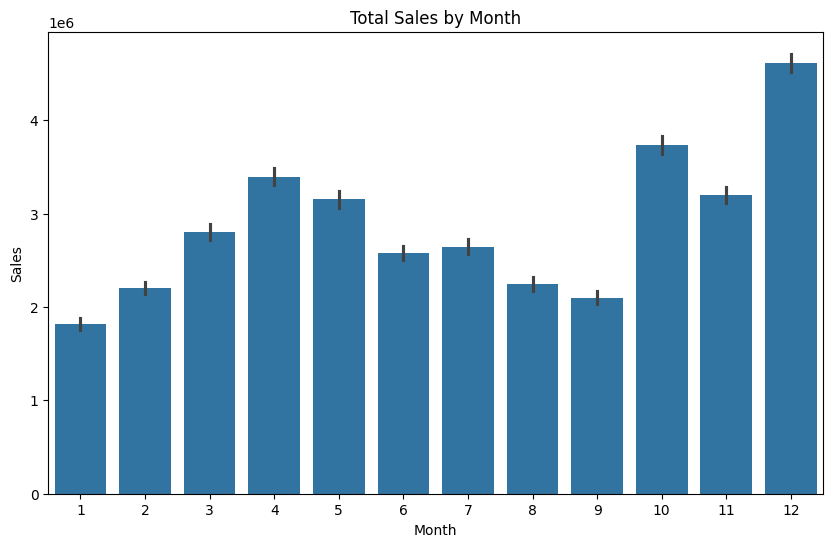

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', data=data, estimator=sum)
plt.title('Total Sales by Month')
plt.show()

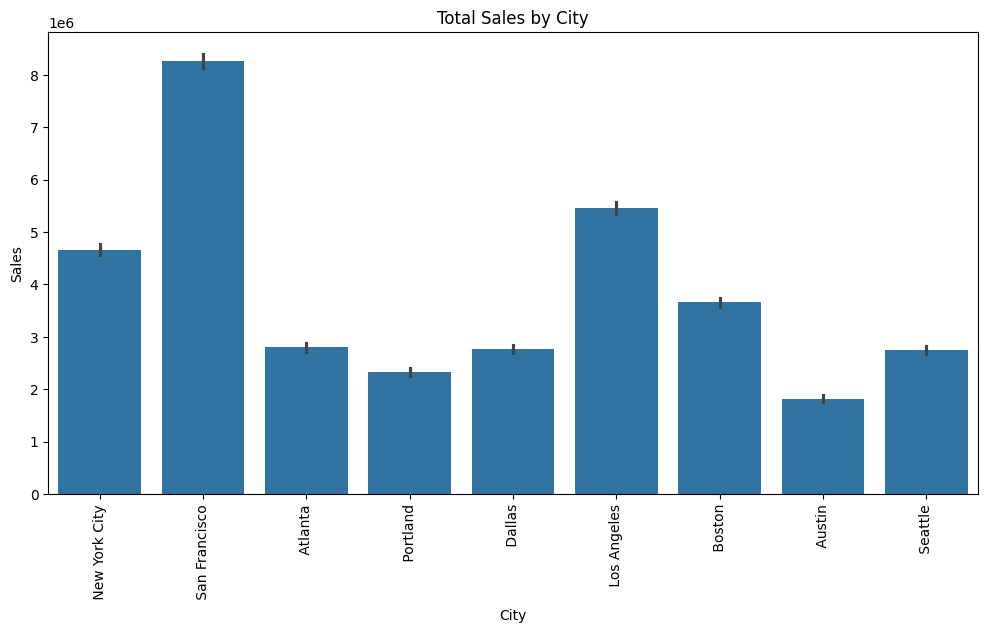

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Sales', data=data, estimator=sum)
plt.title('Total Sales by City')
plt.xticks(rotation=90)
plt.show()

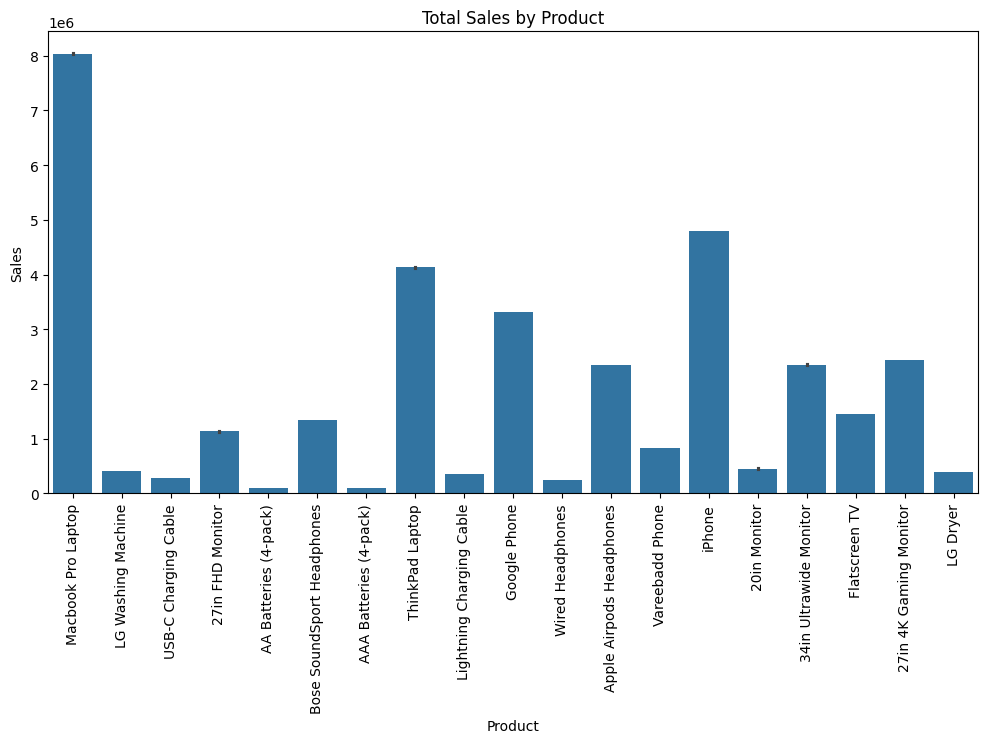

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Sales', data=data, estimator=sum)
plt.title('Total Sales by Product')
plt.xticks(rotation=90)
plt.show()

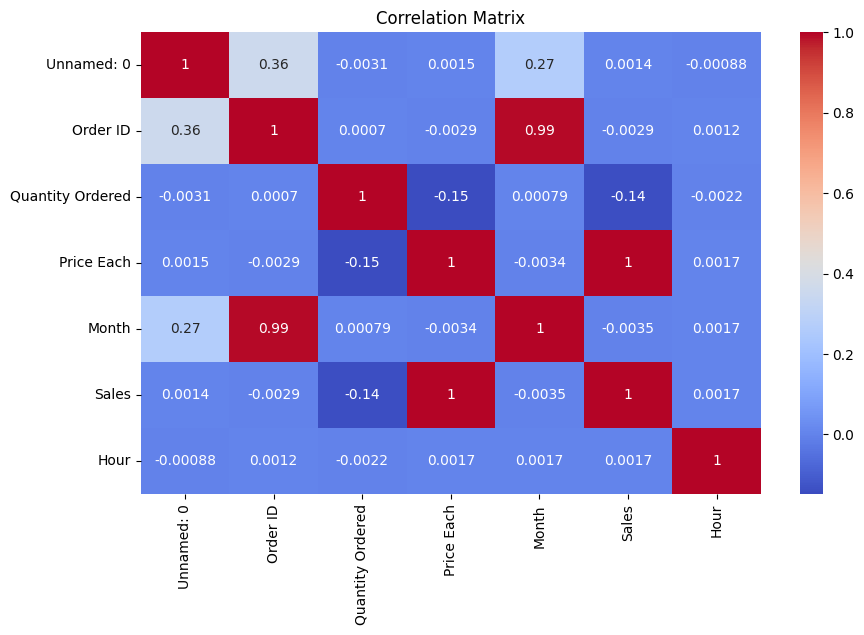

In [ ]:
numeric_columns = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

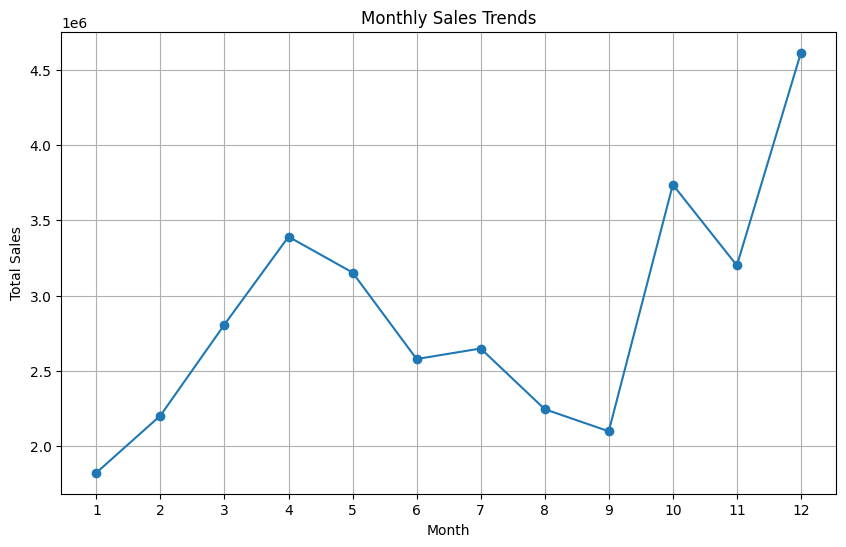

In [ ]:
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('Month')

plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_sales['Month'])
plt.grid(True)
plt.show()

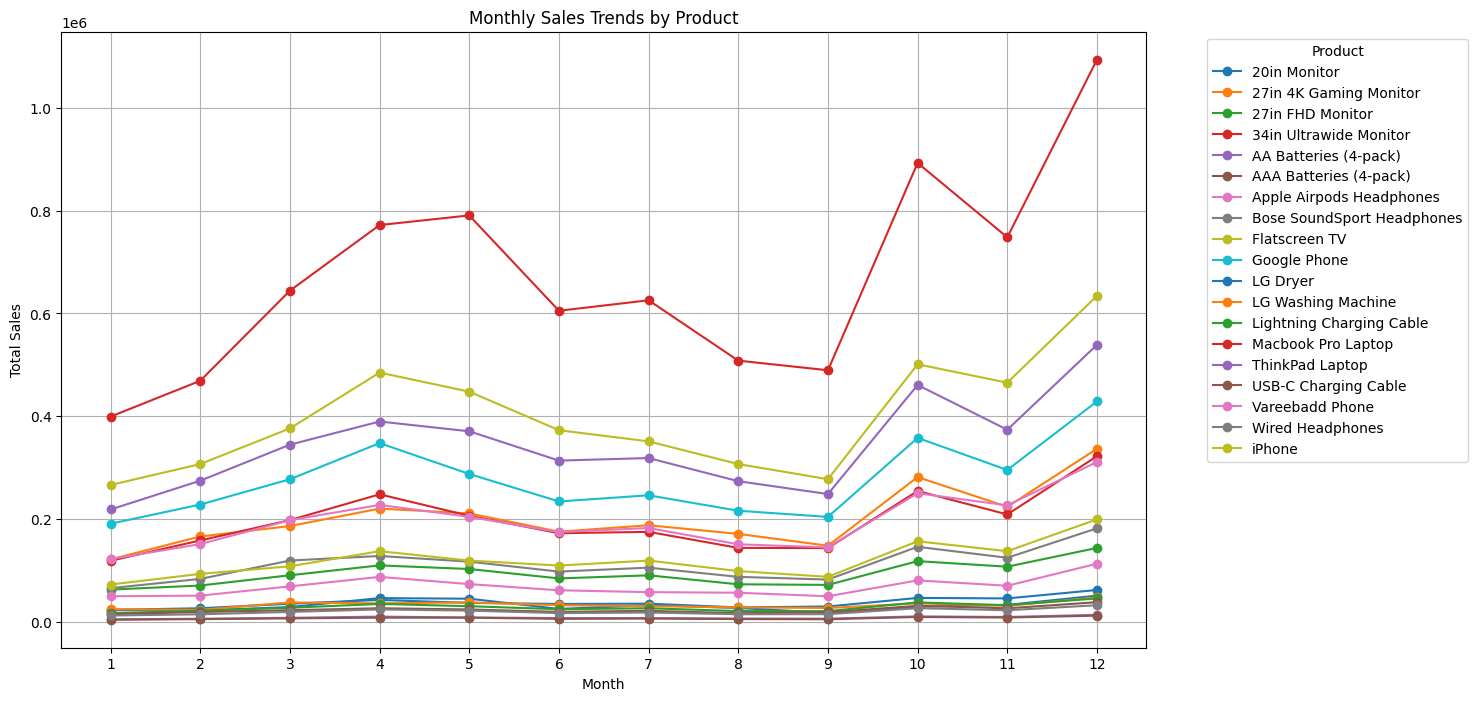

In [ ]:
monthly_sales_by_product = data.groupby(['Month', 'Product'])['Sales'].sum().unstack().fillna(0)
monthly_sales_by_product = monthly_sales_by_product.sort_index()

plt.figure(figsize=(14,8))

for prod in monthly_sales_by_product.columns:
    plt.plot(monthly_sales_by_product.index, monthly_sales_by_product[prod], marker='o', label=prod)

plt.title('Monthly Sales Trends by Product')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_sales_by_product.index)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()